##Introduction
###This project focuses on time series analysis using the Netflix Stock Price dataset available on Kaggle. The dataset includes historical stock price data for Netflix (NFLX), providing crucial financial metrics such as opening, closing, highest, and lowest prices, along with the stock volume over a specific time period. The objective of this analysis is to forecast future stock prices using the ARIMA (AutoRegressive Integrated Moving Average) model, a powerful tool for time series forecasting.

###Time series forecasting for stock prices is crucial for financial decision-making, especially in trading and investments. By leveraging the ARIMA model, we aim to capture the historical trends and patterns in the Netflix stock data to make accurate future predictions. This analysis will cover data preprocessing, exploratory data analysis, model building, and performance evaluation.

##Importing Necessary Libraries.

In [1]:
import pandas as pd #It imports the pandas library and assigns it the alias "pd" for easier use.
import numpy as np #It brings in a tool called numpy, nicknamed "np", to help with number crunching in your code.
import matplotlib.pyplot as plt #It imports plotting tools from matplotlib, nicknamed "plt", for creating visualizations.
import seaborn as sn #It imports the seaborn library, nicknamed "sns", for making statistical visualizations

##Loading the Dataframe.

In [2]:
df = pd.read_csv("NFLX.csv") #It reads data from the "NFLX.csv" file and stores it in a table called "df" using pandas

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


###ARIMA requires the dataset to be in a time-series format, meaning your index should be a datetime object.

In [4]:
df.columns #It shows the names of all the columns in the DataFrame df.

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.dtypes #It shows the data type of each column in the DataFrame df.

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [6]:
df["Date"]= pd.to_datetime(df["Date"])
#This line converts the 'Month' column in your DataFrame (df) to datetime objects.
#This is important for time series analysis as it allows pandas to understand the temporal order of your data.
df #Shows the updated DataFrame.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
...,...,...,...,...,...,...,...
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700


In [7]:
df.dtypes #It shows the data type of each column in the DataFrame df.

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [8]:
# Set the Date column as the index
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
...,...,...,...,...,...,...
2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600


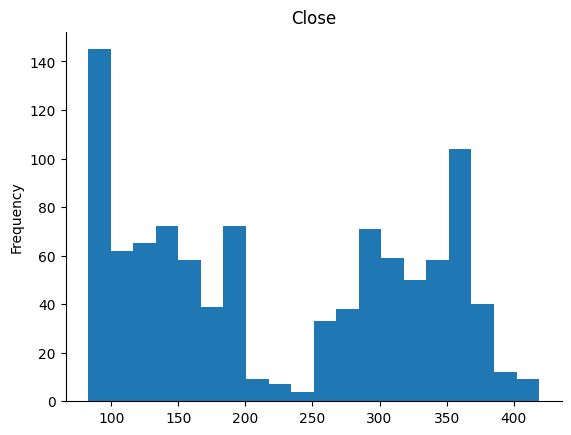

In [9]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)
#It creates a histogram of the '#Passengers' data, with 20 bins

In [10]:
# Check for missing data
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


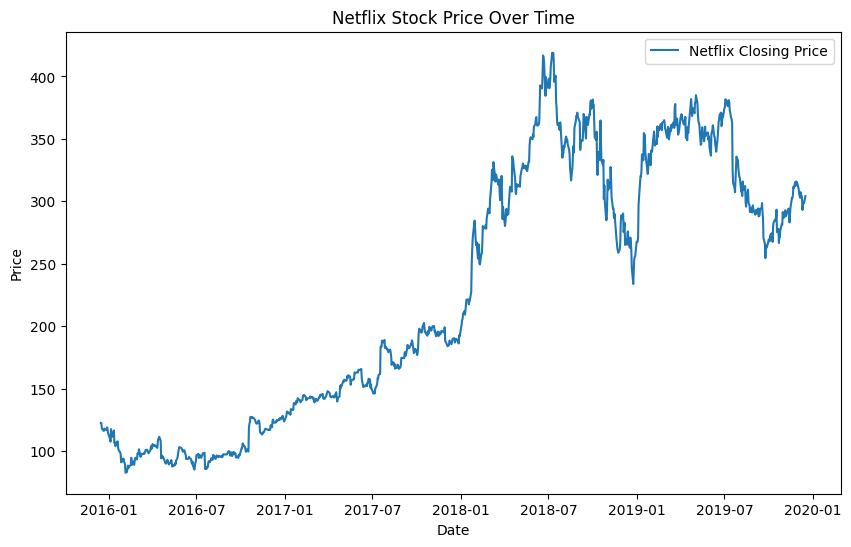

In [11]:
import matplotlib.pyplot as plt

# Plotting the closing price over time
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Netflix Closing Price')
plt.title('Netflix Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [12]:
data = df['Close']

In [13]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_, nobs_, critical_values, icbest_ = adfuller(data)

###It performs the Augmented Dickey-Fuller test (ADF) to check if the time series data in df is stationary and stores the results in several variables. The test helps determine if the data has a unit root, which would indicate non-stationarity.

In [14]:
print(pvalue) #if pvalue > 0.05 then data is not stationary

0.7245824088390834


In [15]:
df["year"]= [d.year for d in df.index] #It extracts the year from the 'Date' index and creates a new 'year' column in the DataFrame.

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000,2015
2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900,2015
2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100,2015
2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000,2015
2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000,2015
...,...,...,...,...,...,...,...
2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100,2019
2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800,2019
2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600,2019


In [17]:
df['month'] = df.index.strftime('%b') #It extracts the month abbreviation from the 'Date' index and creates a new 'month' column.
df # df then displays the updated DataFrame.

,Open,High,Low,Close,Adj Close,Volume,year,month
Date,,,,,,,,
2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000,2015,Dec
2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900,2015,Dec
2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100,2015,Dec
2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000,2015,Dec
2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000,2015,Dec
...,...,...,...,...,...,...,...,...
2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100,2019,Dec
2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800,2019,Dec
2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600,2019,Dec


In [18]:
years= df['year'].unique() #It gets all unique years from the 'year' column and stores them in the years variable.
years

array([2015, 2016, 2017, 2018, 2019])

In [19]:
months= df['month'].unique() #It retrieves all the unique month abbreviations from the 'month' column and stores them in the months variable.
months

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

In [20]:
df['Day'] = df.index.day #It extracts the day of the month from the 'Date' index and creates a new 'Day' column.

In [21]:
df['Day']

,Day
Date,
2015-12-16,16
2015-12-17,17
2015-12-18,18
2015-12-21,21
2015-12-22,22
...,...
2019-12-10,10
2019-12-11,11
2019-12-12,12


In [22]:
dates= df['Day'].unique() #It gets all unique days of the month from the 'Day' column and stores them in dates.
dates

array([16, 17, 18, 21, 22, 23, 24, 28, 29, 30, 31,  4,  5,  6,  7,  8, 11,
       12, 13, 14, 15, 19, 20, 25, 26, 27,  1,  2,  3,  9, 10],
      dtype=int32)

<Axes: xlabel='year', ylabel='Close'>

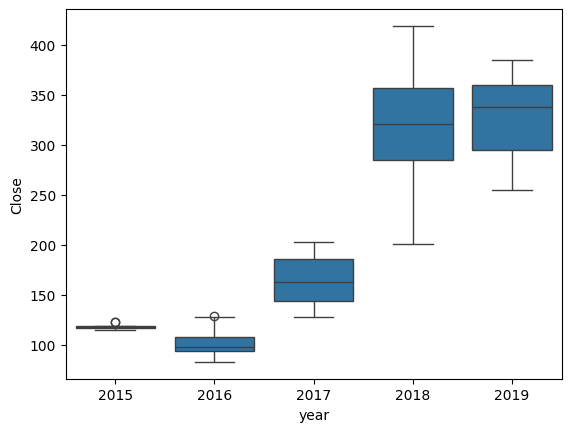

In [23]:
sn.boxplot(x='year',y='Close',data=df) #It creates a box plot to visualize the distribution of 'Close' prices (y-axis) for each year (x-axis) using the seaborn library.

<Axes: xlabel='month', ylabel='Close'>

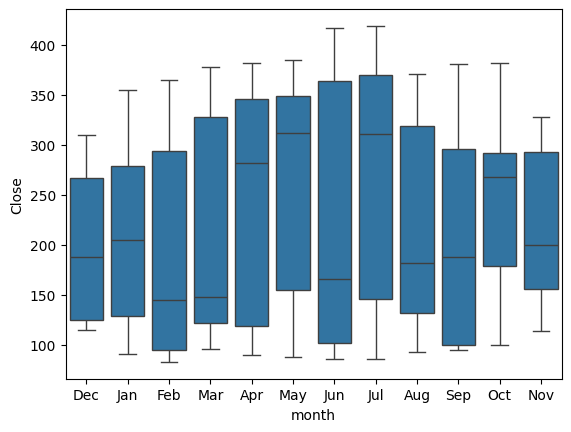

In [24]:
sn.boxplot(x='month', y='Close', data=df) #It creates a box plot showing the distribution of 'Close' prices for each month.

In [25]:
df_close = df[['Close']] #It creates a new DataFrame called df_close containing only the 'Close' column from the original DataFrame df.
df_close

,Close
Date,
2015-12-16,122.639999
2015-12-17,122.510002
2015-12-18,118.019997
2015-12-21,116.629997
2015-12-22,116.239998
...,...
2019-12-10,293.119995
2019-12-11,298.929993
2019-12-12,298.440002


In [26]:
# Ensuring the index has a frequency
df.index = pd.to_datetime(df.index)  # Making sure the index is datetime

# Setting the frequency to 'B' for business days.
df.index.freq = pd.infer_freq(df.index) #It attempts to automatically determine the frequency of the DataFrame's index

# Keep only the 'Close' column and maintain the index
df_close = df[['Close']]
df_close

,Close
Date,
2015-12-16,122.639999
2015-12-17,122.510002
2015-12-18,118.019997
2015-12-21,116.629997
2015-12-22,116.239998
...,...
2019-12-10,293.119995
2019-12-11,298.929993
2019-12-12,298.440002


In [27]:
# Resample the DataFrame to ensure a complete index (daily frequency)
df_resampled = df_close.resample('B').ffill()  # Forward filling to handle missing values


In [28]:
# It sets the frequency of the df_resampled DataFrame's index to 'B', representing business days.
df_resampled.index.freq = 'B'

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Performing seasonal decomposition
decompose = seasonal_decompose(df_resampled['Close'], model='additive')

In [30]:
trend= decompose.trend #This line extracts the overall upward or downward movement (trend) from the decomposed time series data and assigns it to the variable trend.
seasonal=decompose.seasonal #This line extracts the repeating patterns or cycles (seasonality) within the data and assigns it to the variable seasonal.
residual=decompose.resid #This line extracts the remaining noise or random fluctuations (residuals) after removing the trend and seasonality and assigns it to the variable residual.

In [31]:
trend

,trend
Date,
2015-12-16,NaN
2015-12-17,NaN
2015-12-18,119.207999
2015-12-21,118.312000
2015-12-22,117.276000
...,...
2019-12-10,300.067999
2019-12-11,298.297998
2019-12-12,298.639996


In [32]:
seasonal

,seasonal
Date,
2015-12-16,0.334536
2015-12-17,0.250999
2015-12-18,-0.247867
2015-12-21,-0.334203
2015-12-22,-0.003464
...,...
2019-12-10,-0.003464
2019-12-11,0.334536
2019-12-12,0.250999


In [33]:
residual

,resid
Date,
2015-12-16,NaN
2015-12-17,NaN
2015-12-18,-0.940134
2015-12-21,-1.347799
2015-12-22,-1.032538
...,...
2019-12-10,-6.944540
2019-12-11,0.297459
2019-12-12,-0.450993


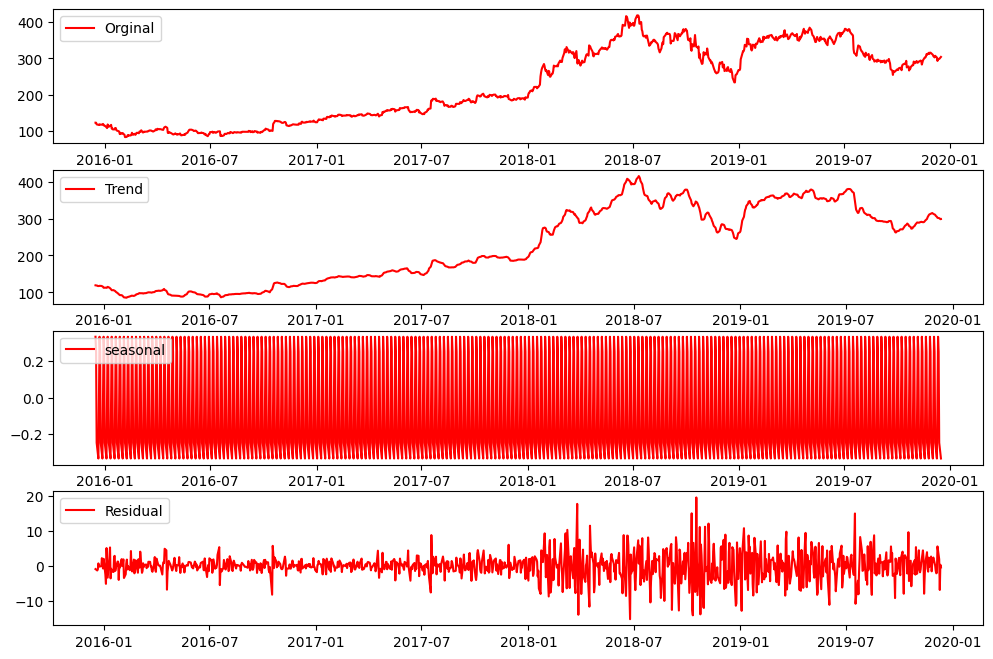

In [34]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_resampled["Close"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label="seasonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [35]:
!pip install pmdarima
from pmdarima.arima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.0 MB/s eta 0:00:00


In [36]:
arima_model=auto_arima(df_resampled["Close"], start_p=1, d=1, q=1,
                       max_p=5, max_d=5, max_q=5, m=12,
                       start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',
                       supress_warning=True,
                       stepwise=True, n_fits=50)
#After executing this code, the arima_model variable will contain the best-fitting ARIMA model selected by the auto_arima function.
#This model can then be used for forecasting or further analysis of the time series data.

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=7348.741, Time=3.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7344.091, Time=0.41 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7080.572, Time=2.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.37 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7345.895, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6920.212, Time=1.48 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6855.938, Time=5.00 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=6813.323, Time=4.45 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=6788.084, Time=9.92 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=61.95 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=40.36 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=6786.378, Time=6.33 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=6812.063, Time=7.11 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=inf, Time=50.85 sec
 ARIMA(0,1,0)(4,1,1)[12]            

In [37]:
arima_model.summary()
#It displays a summary of the fitted ARIMA model, including details like the chosen model order, coefficients, statistical significance of the parameters, and goodness-of-fit metrics.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1044
Model:             SARIMAX(0, 1, 0)x(5, 1, 0, 12)   Log Likelihood               -3387.189
Date:                            Sat, 19 Oct 2024   AIC                           6786.378
Time:                                    18:56:48   BIC                           6816.007
Sample:                                12-16-2015   HQIC                          6797.622
                                     - 12-16-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8459      0.023    -36.587      0.000      -0.891      -0.801
ar.S.L24      -0.7311      0.030    -24.245      0.000      -0.790      -0.672
ar.S.L36      -0.5179      0.032    -16.005      0.000      -0.581      -0.454
ar.S.L48      -0.3400      0.030    -11.201      0.000      -0.399      -0.281
ar.S.L60      -0.1633      0.024     -6.796      0.000      -0.210      -0.116
sigma2        41.2712      1.071     38.526      0.000      39.172      43.371
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               684.15
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):              10.11   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
size = int(len(df_resampled) * 0.66)
x_train, x_test = df_resampled[:size], df_resampled[size:]
#this code divides the dataset into two subsets: one for training the ARIMA model and another for testing its performance on unseen data.

In [39]:
x_train.shape, x_test.shape

((689, 1), (355, 1))

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
model=SARIMAX(x_train["Close"],
             order=(0,1,1),
             seasonal_order=(2,1,1,12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  689
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2008.950
Date:                            Sat, 19 Oct 2024   AIC                           4027.899
Time:                                    18:59:27   BIC                           4050.480
Sample:                                12-16-2015   HQIC                          4036.642
                                     - 08-06-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0425      0.024      1.751      0.080      -0.005       0.090
ar.S.L12      -0.0191      0.033     -0.581      0.561      -0.084       0.045
ar.S.L24      -0.0866      0.037     -2.366      0.018      -0.158      -0.015
ma.S.L12      -0.9565      0.021    -46.064      0.000      -0.997      -0.916
sigma2        21.2967      0.534     39.885      0.000      20.250      22.343
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1647.94
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               5.77   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
start_index=0
end_index=len(x_train)-1
train_prediction=result.predict(start_index, end_index)
train_prediction
#It generates predictions for the training data (x_train["Close"]) using the fitted SARIMAX model and stores them in train_prediction.

,predicted_mean
Date,
2015-12-16,0.000000
2015-12-17,122.640108
2015-12-18,122.510002
2015-12-21,118.019989
2015-12-22,116.629995
...,...
2018-07-31,334.592854
2018-08-01,338.955135
2018-08-02,338.773806


In [44]:
st_index=len(x_train)
ed_index=len(df)-1
predction=result.predict(st_index,ed_index)
predction
#this code uses the trained SARIMAX model to forecast values for the testing dataset and then shows the predicted values.

,predicted_mean
2018-08-07,351.493172
2018-08-08,352.819569
2018-08-09,352.367605
2018-08-10,352.184564
2018-08-13,354.822296
...,...
2019-10-18,512.206687
2019-10-21,512.477883
2019-10-22,513.247866
2019-10-23,515.375630


<Axes: xlabel='Date'>

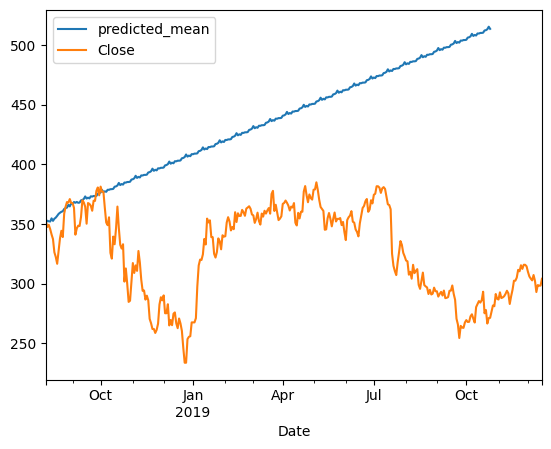

In [45]:
predction.plot(legend=True)
x_test['Close'].plot(legend=True)
#This code plots both the predicted and actual values on the same graph.

In [46]:
import math
from sklearn.metrics import mean_squared_error

In [49]:
# Print shapes to debug
print(f"Train Close actual: {x_train['Close'].shape}")
print(f"Train predictions: {train_prediction.shape}")
print(f"Test Close actual: {x_test['Close'].shape}")
print(f"Test predictions: {predction.shape}")

Train Close actual: (689,)
Train predictions: (689,)
Test Close actual: (355,)
Test predictions: (318,)


In [54]:
trainScore=math.sqrt(mean_squared_error(x_train['Close'],train_prediction))
testScore=math.sqrt(mean_squared_error(x_test["Close"],predction))
trainScore,testScore

ValueError: Found input variables with inconsistent numbers of samples: [355, 318]